# ADVANCED REGRESSION ASSIGNMENT

In [60]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

In [2]:
#Read the dataset from csv file
housing = pd.read_csv("train.csv")

In [3]:
#check the shape
housing.shape

(1460, 81)

In [4]:
# summary of the dataset: 1460 rows, 81 columns, having null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#look the dataset head
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
#check for the data distribution
housing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
#As we can see that the data set is very huge, we need to figure out what data is not relevent and remove it in our cleaning section
#To do so 1st we need to identify max(more than 75%) percentage of null value columns
nullPercentage = round(housing.isnull().mean()*100,2)

In [8]:
nullPercentage.head(30)

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage     17.74
LotArea          0.00
Street           0.00
Alley           93.77
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.55
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
dtype: float64

In [9]:
nullPercentage.tail(30)

BedroomAbvGr      0.00
KitchenAbvGr      0.00
KitchenQual       0.00
TotRmsAbvGrd      0.00
Functional        0.00
Fireplaces        0.00
FireplaceQu      47.26
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageCars        0.00
GarageArea        0.00
GarageQual        5.55
GarageCond        5.55
PavedDrive        0.00
WoodDeckSF        0.00
OpenPorchSF       0.00
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
PoolArea          0.00
PoolQC           99.52
Fence            80.75
MiscFeature      96.30
MiscVal           0.00
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
dtype: float64

# Data Cleaning

In [11]:
#Drop the columns with more then 75% null values 

percentage = 75.0
threshold =  int(((100-percentage)/100)*housing.shape[0] + 1)
New_Housing_df = housing.dropna(axis=1, thresh=threshold)

In [12]:
#Look for the info after deleting the columns
New_Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [14]:
New_Housing_df = New_Housing_df.drop(['FireplaceQu'], axis=1)
New_Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [15]:
#Dropping the "LotFrontage" column also as it has no significance to the price
New_Housing_df = New_Housing_df.drop(['LotFrontage'], axis=1)

In [16]:
New_Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Imputing missing values

In [19]:
# Before imputing the missing values we will understand the data dictionary for the columns having missing values
# we have 12 columns with  missing values, we will have a look into the data dictonary of the missing value columns

# data distribution in MasVnrType column
New_Housing_df['MasVnrType'].astype('category').value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [20]:
# data distribution in MasVnrArea column
New_Housing_df['MasVnrArea'].astype('category').value_counts()

0.0       861
180.0       8
108.0       8
72.0        8
16.0        7
         ... 
254.0       1
255.0       1
258.0       1
259.0       1
1600.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [21]:
# data distribution in BsmtQual column
New_Housing_df['BsmtQual'].astype('category').value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [22]:
# data distribution in BsmtCond column
New_Housing_df['BsmtCond'].astype('category').value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [23]:
# data distribution in BsmtExposure column
New_Housing_df['BsmtExposure'].astype('category').value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [24]:
# data distribution in BsmtFinType1 column
New_Housing_df['BsmtFinType1'].astype('category').value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [25]:
# data distribution in BsmtFinType2 column
New_Housing_df['BsmtFinType2'].astype('category').value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [26]:
# data distribution in GarageType column
New_Housing_df['GarageType'].astype('category').value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [27]:
# data distribution in GarageYrBlt column
New_Housing_df['GarageYrBlt'].astype('category').value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1906.0     1
1927.0     1
1933.0     1
1900.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [28]:
# data distribution in GarageFinish column
New_Housing_df['GarageFinish'].astype('category').value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [29]:
# data distribution in GarageQual column
New_Housing_df['GarageQual'].astype('category').value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [30]:
# data distribution in GarageCond column
New_Housing_df['GarageCond'].astype('category').value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [32]:
#Now try to fill the missing values for all the required columns from above

# based on data dictionary na in MasVnrType means 'none'
New_Housing_df.MasVnrType.fillna('None',inplace=True)

# as the house must have some area so we can take the mean value here
New_Housing_df.MasVnrArea.fillna(New_Housing_df.MasVnrArea.mean(),inplace=True)

# for BsmtQual we can take No Basement as the missing value.
New_Housing_df.BsmtQual.fillna('No Basement',inplace=True)
# for BsmtCond we can take No Basement as the missing value.
New_Housing_df.BsmtCond.fillna('No Basement',inplace=True)
# for BsmtExposure we can take No Basement as the missing value.
New_Housing_df.BsmtExposure.fillna('No Basement',inplace=True)
# for BsmtFinType1 we can take No Basement as the missing value.
New_Housing_df.BsmtFinType1.fillna('No Basement',inplace=True)
# for BsmtFinType2 we can take No Basement as the missing value.
New_Housing_df.BsmtFinType2.fillna('No Basement',inplace=True)

# for GarageType we can take No Garage as the missing value.
New_Housing_df.GarageType.fillna('No Garage',inplace=True)
#for GarageYrBlt, no year is given means no garage so we can provide the current year
New_Housing_df.GarageYrBlt.fillna(2022,inplace=True)
# for GarageFinish we can take No Garage as the missing value.
New_Housing_df.GarageFinish.fillna('No Garage',inplace=True)
# for GarageQual we can take No Garage as the missing value.
New_Housing_df.GarageQual.fillna('No Garage',inplace=True)
# for GarageCond we can take No Garage as the missing value.
New_Housing_df.GarageCond.fillna('No Garage',inplace=True)

In [33]:
# As per my analysis 'Id', 'Street' & 'Utilities' is explaining the lowest valrience hence dropping these columns
New_Housing_df = New_Housing_df.drop(['Id','Street','Utilities'], axis=1)

In [34]:
New_Housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   LandSlope      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   Condition1     1460 non-null   object 
 9   Condition2     1460 non-null   object 
 10  BldgType       1460 non-null   object 
 11  HouseStyle     1460 non-null   object 
 12  OverallQual    1460 non-null   int64  
 13  OverallCond    1460 non-null   int64  
 14  YearBuilt      1460 non-null   int64  
 15  YearRemodAdd   1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

Now there are no missing values left in the dataset

In [35]:
# let's take all numeric variables in the dataset
# to check pairplot and corelation
New_Housing_df[list(New_Housing_df.dtypes[New_Housing_df.dtypes!='object'].index)].describe()

MSSubClass        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     56.897260   10516.828082     6.099315     5.575342  1971.267808   
std      42.300571    9981.264932     1.382997     1.112799    30.202904   
min      20.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      20.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      50.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      70.000000   11601.500000     7.000000     6.000000  2000.000000   
max     190.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.685262   443.639726    46.549315   567.240411  ...   
std       20.645407   180.569112   456.098091   161.319273   441.866955  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000  ...   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000  ...   
75%     2004.000000   164.250000   712.250000     0.000000   808.000000  ...   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 36 columns]

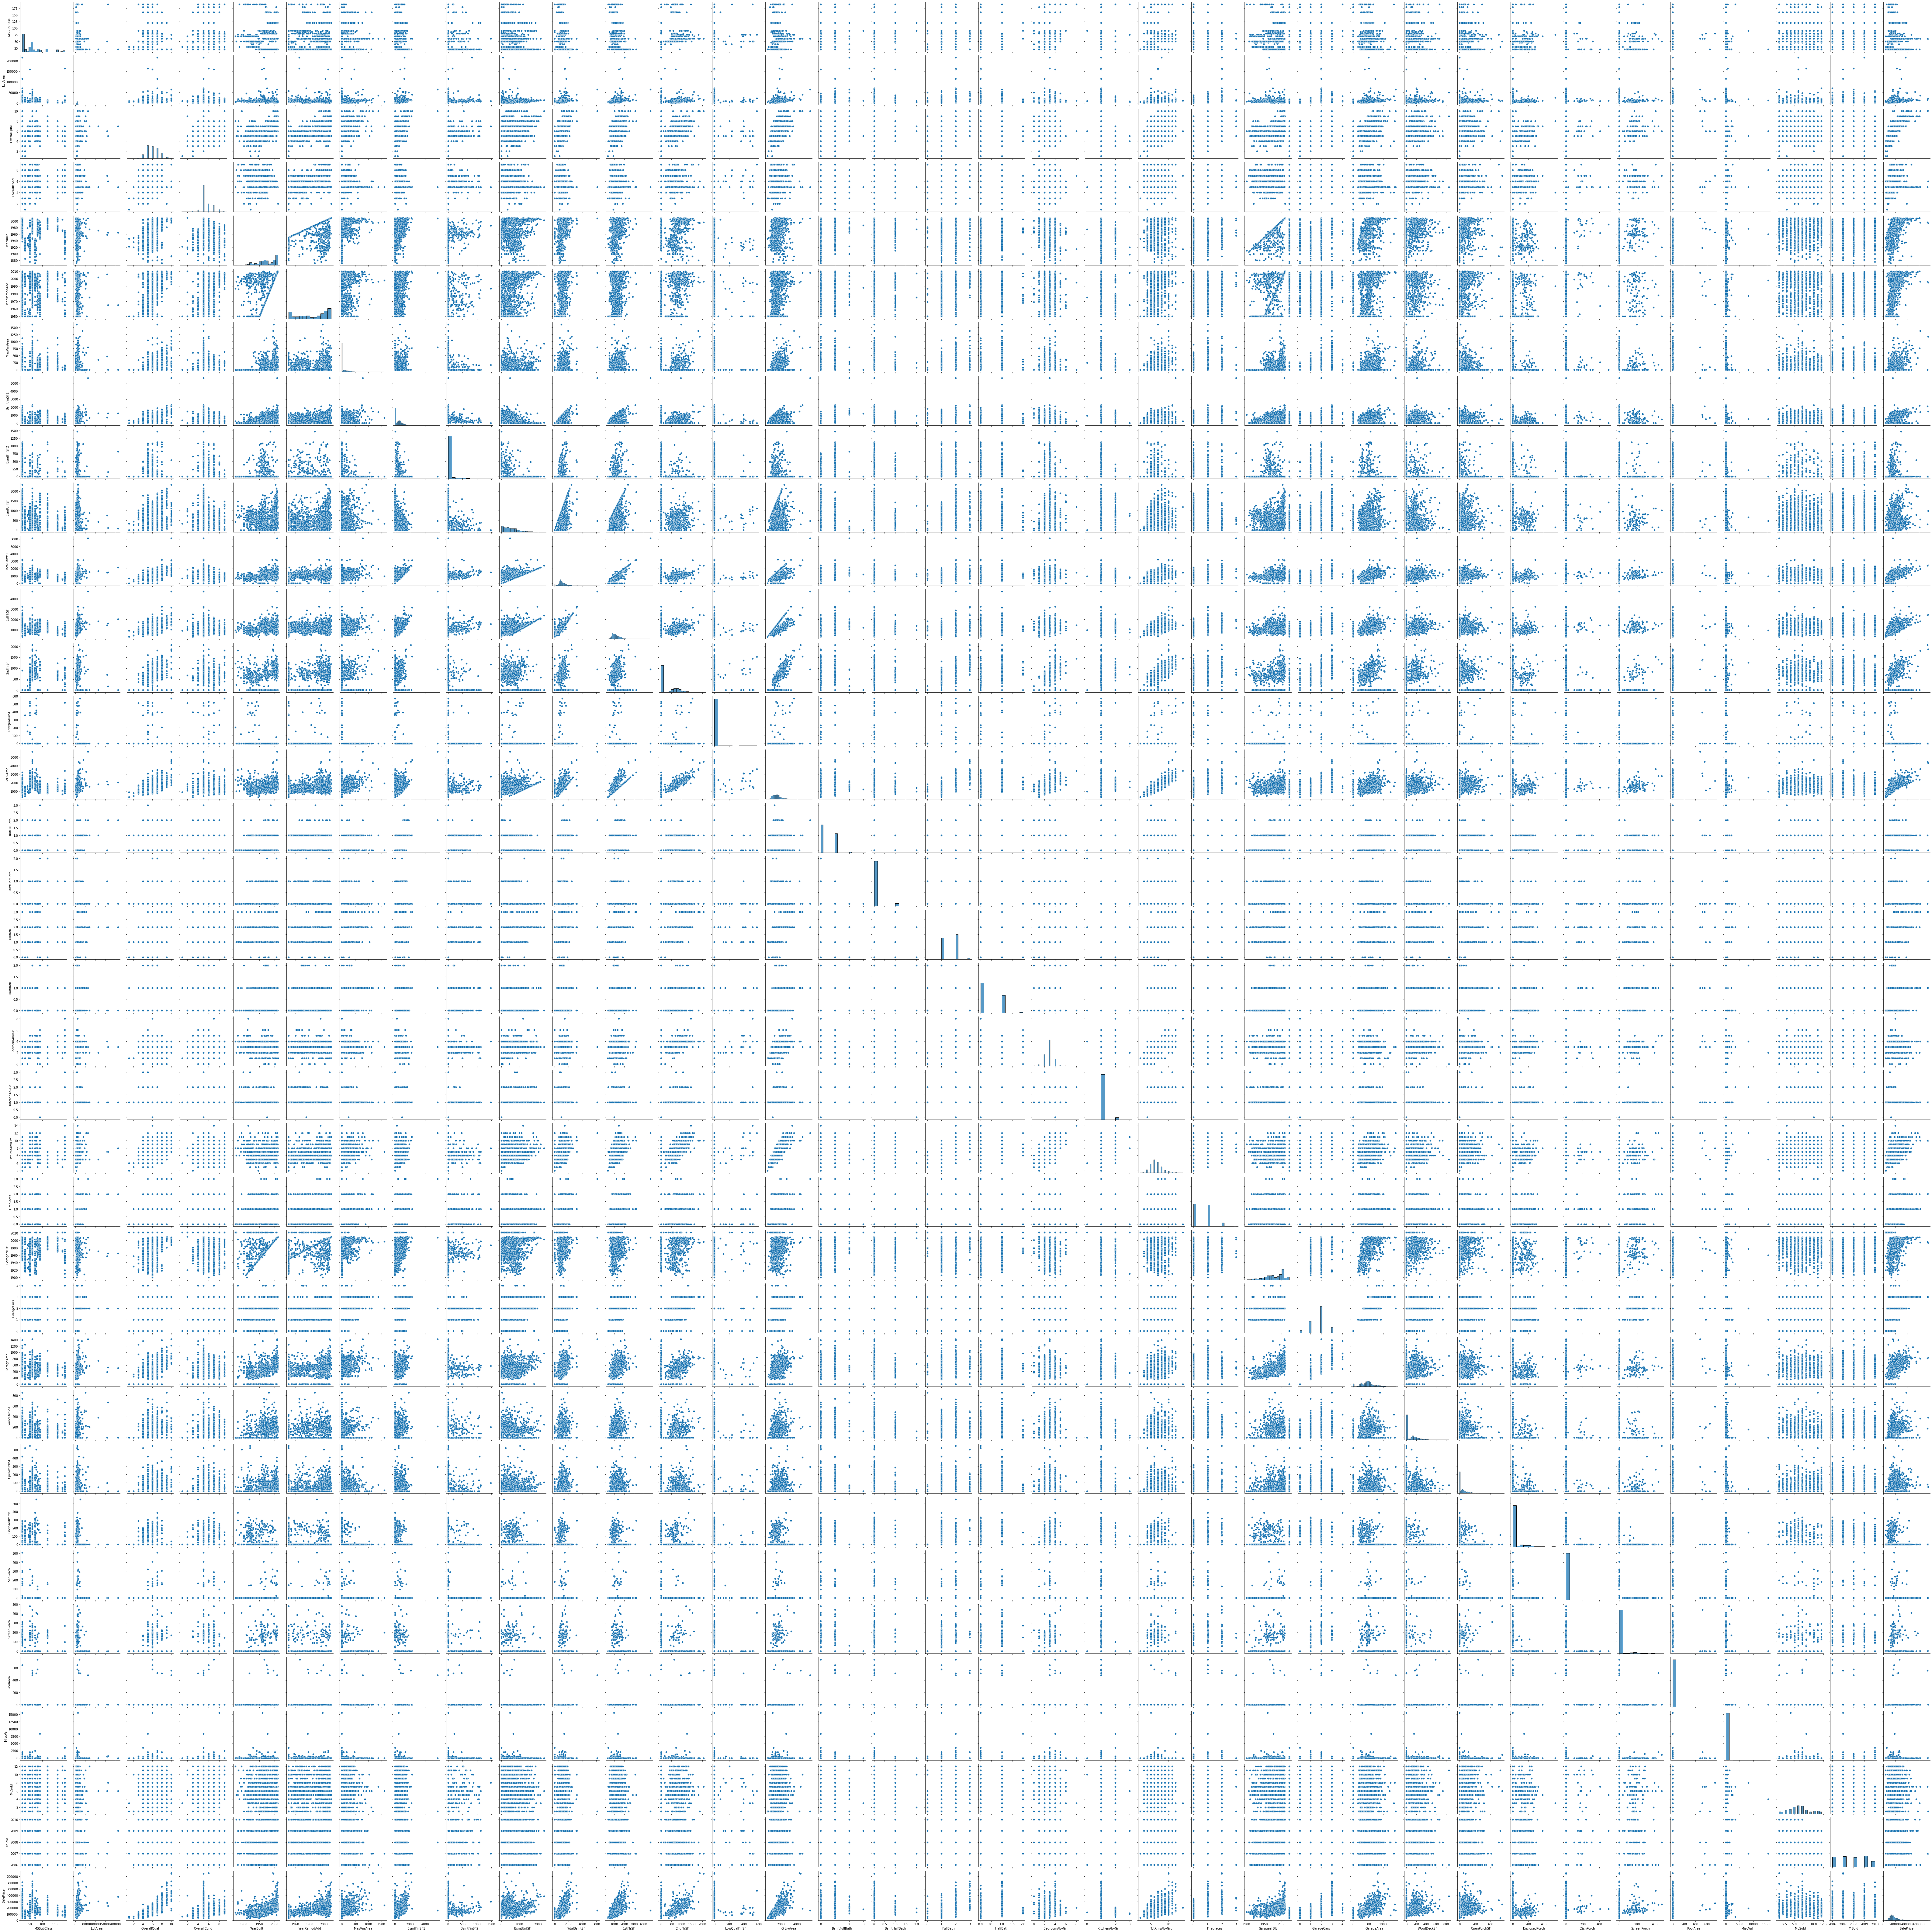

In [36]:
# scatter plot for all numeric columns
sns.pairplot(New_Housing_df[list(New_Housing_df.dtypes[New_Housing_df.dtypes!='object'].index)])
plt.show()

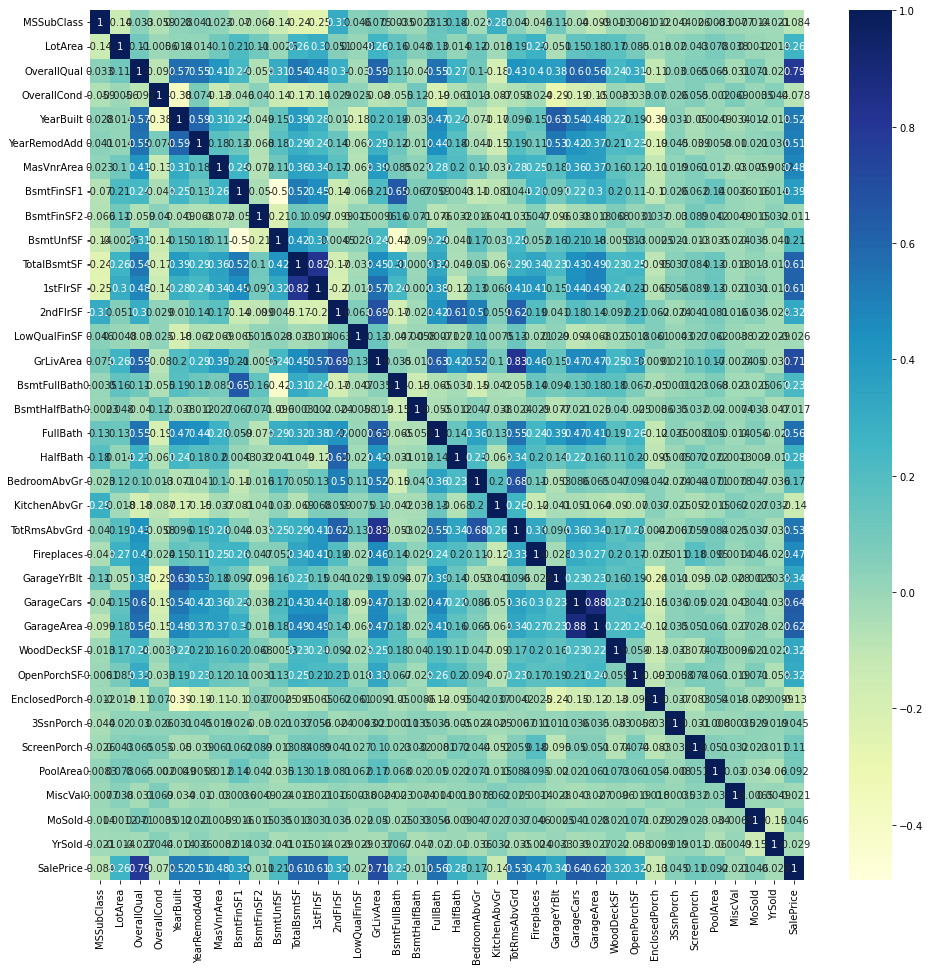

In [38]:
#Plotting heatmap to check the corellation between varable
plt.figure(figsize=(16,16))
sns.heatmap(New_Housing_df[list(New_Housing_df.dtypes[New_Housing_df.dtypes!='object'].index)].corr(), cmap="YlGnBu",annot=True)
plt.show()

In [40]:
temp_df = list(New_Housing_df.dtypes[New_Housing_df.dtypes !='object'].index)

In [41]:
temp_df

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [42]:
#Keeping only those variables which have sence for treating the outliers
temp_df = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch','ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
temp_df

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

In [45]:
#drop the outliers with lower and upper quantile as 0.25 & 0.99 respectively
def handle_outliers(dataset):
    list = []
    for col in temp_df:
        Q1 = dataset[col].quantile(.25)
        Q3 = dataset[col].quantile(.99)
        IQR = Q3-Q1
        dataset =  dataset[(dataset[col] >= (Q1-(1.5*IQR))) & (dataset[col] <= (Q3+(1.5*IQR)))] 
    return dataset   

New_Housing_df = handle_outliers(New_Housing_df)

In [46]:
#Check the shape again
New_Housing_df.shape

(1441, 72)

## Now derive new columns from original columns

In [47]:
# We can derive the ageofhouse using YearBuilt columns
New_Housing_df["ageofhouse"] = New_Housing_df.YearBuilt.max()-New_Housing_df.YearBuilt
# ageofhouse_in_months as we have month and year both for sold house
New_Housing_df["ageofhouse_in_months"] = (((New_Housing_df["YrSold"]-1) - New_Housing_df["YearBuilt"])*12) + New_Housing_df["MoSold"]
# ageofgarage
New_Housing_df["ageofgarage"] = New_Housing_df.GarageYrBlt.max()-New_Housing_df.GarageYrBlt
# time between house build and remodel = YearRemodAdd - year build
New_Housing_df["house_remodel_time"] = New_Housing_df["YearRemodAdd"] - New_Housing_df["YearBuilt"]

In [49]:
# check data frame after deriving columns
New_Housing_df[["ageofhouse","ageofhouse_in_months", "ageofgarage", "house_remodel_time"]].sample(15)

ageofhouse  ageofhouse_in_months  ageofgarage  house_remodel_time
436           90                  1030         32.0                  30
377            6                    36         18.0                   1
825            3                     6         15.0                   1
483           12                    89         24.0                   0
1362          90                  1062        102.0                  87
13             4                     8         16.0                   1
1238           5                     3         17.0                   0
652           14                   151         26.0                   0
278            4                     5         15.0                   1
1373           9                    63         21.0                   1
84            15                   161         27.0                   1
1072          62                   692         68.0                   2
1000          58                   679         66.0                   0
1336          37                   419         49.0                   0
316           30                   344         39.0                   0

In [50]:
New_Housing_df.head()

MSSubClass MSZoning  LotArea LotShape LandContour LotConfig LandSlope  \
0          60       RL     8450      Reg         Lvl    Inside       Gtl   
1          20       RL     9600      Reg         Lvl       FR2       Gtl   
2          60       RL    11250      IR1         Lvl    Inside       Gtl   
3          70       RL     9550      IR1         Lvl    Corner       Gtl   
4          60       RL    14260      IR1         Lvl       FR2       Gtl   

  Neighborhood Condition1 Condition2  ... MiscVal MoSold  YrSold  SaleType  \
0      CollgCr       Norm       Norm  ...       0      2    2008        WD   
1      Veenker      Feedr       Norm  ...       0      5    2007        WD   
2      CollgCr       Norm       Norm  ...       0      9    2008        WD   
3      Crawfor       Norm       Norm  ...       0      2    2006        WD   
4      NoRidge       Norm       Norm  ...       0     12    2008        WD   

   SaleCondition  SalePrice ageofhouse ageofhouse_in_months ageofgarage  \
0         Normal     208500          7                   50        19.0   
1         Normal     181500         34                  365        46.0   
2         Normal     223500          9                   81        21.0   
3        Abnorml     140000         95                 1082        24.0   
4         Normal     250000         10                   96        22.0   

  house_remodel_time  
0                  0  
1                  0  
2                  1  
3                 55  
4                  0  

[5 rows x 76 columns]

In [51]:
# Drop original year and month columns after deriving columns
New_Housing_df = New_Housing_df.drop(['YearBuilt','YrSold','YearRemodAdd','MoSold','GarageYrBlt'], axis=1)

# Model Building and Evaluation

In [52]:
# split into X and y
X = New_Housing_df.drop(['SalePrice'], axis=1)
y = New_Housing_df['SalePrice']

In [54]:
# creating dummy variables for yes/no categorical variables and map Y to 1 and N to 0
X['CentralAir'] = X.CentralAir.map({'N':0,'Y':1})
X['CentralAir'].head()

0    1
1    1
2    1
3    1
4    1
Name: CentralAir, dtype: int64

In [55]:
# seperate all the categorical variables to create the dummy variables
housing_cat = X.select_dtypes(include=['object'])
housing_cat.head()

MSZoning LotShape LandContour LotConfig LandSlope Neighborhood Condition1  \
0       RL      Reg         Lvl    Inside       Gtl      CollgCr       Norm   
1       RL      Reg         Lvl       FR2       Gtl      Veenker      Feedr   
2       RL      IR1         Lvl    Inside       Gtl      CollgCr       Norm   
3       RL      IR1         Lvl    Corner       Gtl      Crawfor       Norm   
4       RL      IR1         Lvl       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  ... Electrical KitchenQual Functional  \
0       Norm     1Fam     2Story  ...      SBrkr          Gd        Typ   
1       Norm     1Fam     1Story  ...      SBrkr          TA        Typ   
2       Norm     1Fam     2Story  ...      SBrkr          Gd        Typ   
3       Norm     1Fam     2Story  ...      SBrkr          Gd        Typ   
4       Norm     1Fam     2Story  ...      SBrkr          Gd        Typ   

  GarageType GarageFinish GarageQual GarageCond PavedDrive SaleType  \
0     Attchd          RFn         TA         TA          Y       WD   
1     Attchd          RFn         TA         TA          Y       WD   
2     Attchd          RFn         TA         TA          Y       WD   
3     Detchd          Unf         TA         TA          Y       WD   
4     Attchd          RFn         TA         TA          Y       WD   

  SaleCondition  
0        Normal  
1        Normal  
2        Normal  
3       Abnorml  
4        Normal  

[5 rows x 35 columns]

In [56]:
# Now convert the categorical variables into dummies
dummies_housing = pd.get_dummies(housing_cat, drop_first=True)
dummies_housing.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0                1  ...               0               0             0   
1                1  ...               0               0             0   
2                1  ...               0               0             0   
3                1  ...               0               0             0   
4                1  ...               0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 200 columns]

In [57]:
# concat the newly created dummy variables with X
X = pd.concat([X, dummies_housing], axis=1)

In [58]:
# now drop the original categorical variables
X = X.drop(list(housing_cat.columns), axis=1)

In [59]:
X.head()

MSSubClass  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0          60     8450            7            5       196.0         706   
1          20     9600            6            8         0.0         978   
2          60    11250            7            5       162.0         486   
3          70     9550            7            5         0.0         216   
4          60    14260            8            5       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  CentralAir  ...  SaleType_ConLI  \
0           0        150          856           1  ...               0   
1           0        284         1262           1  ...               0   
2           0        434          920           1  ...               0   
3           0        540          756           1  ...               0   
4           0        490         1145           1  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 235 columns]

In [61]:
# Now Scale the data, scaling the features - necessary before using Ridge or Lasso

from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=235)

In [62]:
# Check dataset after the scaling
X.describe()

MSSubClass       LotArea   OverallQual   OverallCond    MasVnrArea  \
count  1.441000e+03  1.441000e+03  1.441000e+03  1.441000e+03  1.441000e+03   
mean   9.075938e-17  7.744981e-17 -2.539414e-16  1.800549e-16 -2.457746e-16   
std    1.000347e+00  1.000347e+00  1.000347e+00  1.000347e+00  1.000347e+00   
min   -8.730310e-01 -1.597495e+00 -3.693738e+00 -4.118713e+00 -5.746078e-01   
25%   -8.730310e-01 -4.623987e-01 -7.927017e-01 -5.146046e-01 -5.746078e-01   
50%   -1.616724e-01 -1.074066e-01 -6.744256e-02 -5.146046e-01 -5.746078e-01   
75%    3.125666e-01  2.699213e-01  6.578166e-01  3.864224e-01  3.371964e-01   
max    3.158001e+00  1.111943e+01  2.833594e+00  3.089504e+00  8.321043e+00   

         BsmtFinSF1    BsmtFinSF2     BsmtUnfSF   TotalBsmtSF    CentralAir  \
count  1.441000e+03  1.441000e+03  1.441000e+03  1.441000e+03  1.441000e+03   
mean  -8.459576e-17 -6.995715e-17  9.861801e-17 -2.316753e-16 -1.577888e-16   
std    1.000347e+00  1.000347e+00  1.000347e+00  1.000347e+00  1.000347e+00   
min   -1.009801e+00 -2.840579e-01 -1.286124e+00 -2.526685e+00 -3.785471e+00   
25%   -1.009801e+00 -2.840579e-01 -7.776084e-01 -6.159320e-01  2.641680e-01   
50%   -1.334199e-01 -2.840579e-01 -1.990304e-01 -1.472567e-01  2.641680e-01   
75%    6.227189e-01 -2.840579e-01  5.467926e-01  5.641683e-01  2.641680e-01   
max    4.216113e+00  8.916978e+00  3.993399e+00  5.178817e+00  2.641680e-01   

       ...  SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  \
count  ...    1.441000e+03    1.441000e+03  1.441000e+03  1.441000e+03   
mean   ...   -7.726779e-16    4.883999e-16  1.560168e-16 -3.667068e-16   
std    ...    1.000347e+00    1.000347e+00  1.000347e+00  1.000347e+00   
min    ...   -5.900758e-02   -5.900758e-02 -3.027650e-01 -4.567528e-02   
25%    ...   -5.900758e-02   -5.900758e-02 -3.027650e-01 -4.567528e-02   
50%    ...   -5.900758e-02   -5.900758e-02 -3.027650e-01 -4.567528e-02   
75%    ...   -5.900758e-02   -5.900758e-02 -3.027650e-01 -4.567528e-02   
max    ...    1.694698e+01    1.694698e+01  3.302891e+00  2.189368e+01   

        SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count  1.441000e+03           1.441000e+03          1.441000e+03   
mean   5.486397e-16          -4.559638e-16          5.402803e-17   
std    1.000347e+00           1.000347e+00          1.000347e+00   
min   -2.550531e+00          -5.275961e-02         -8.770580e-02   
25%    3.920752e-01          -5.275961e-02         -8.770580e-02   
50%    3.920752e-01          -5.275961e-02         -8.770580e-02   
75%    3.920752e-01          -5.275961e-02         -8.770580e-02   
max    3.920752e-01           1.895389e+01          1.140175e+01   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count          1.441000e+03          1.441000e+03           1.441000e+03  
mean          -2.521115e-16         -1.607165e-16           1.217316e-16  
std            1.000347e+00          1.000347e+00           1.000347e+00  
min           -1.186364e-01         -2.141325e+00          -3.068442e-01  
25%           -1.186364e-01          4.670006e-01          -3.068442e-01  
50%           -1.186364e-01          4.670006e-01          -3.068442e-01  
75%           -1.186364e-01          4.670006e-01          -3.068442e-01  
max            8.429116e+00          4.670006e-01           3.258983e+00  

[8 rows x 235 columns]

In [63]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [64]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [65]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-3523032409507.524
[ 6.05204287e+02  9.18805319e+03  9.62903849e+03  5.52617627e+03
  2.44222587e+03  3.94650580e+15  1.46193252e+15  4.03779877e+15
 -3.79689943e+15  4.04250000e+02  8.02263507e+15  9.29486233e+15
  1.02799386e+15 -1.08643554e+16  1.28056250e+03 -2.93437500e+02
  2.20562500e+03  4.94375000e+02 -1.66525000e+03 -1.74775000e+03
  2.85250000e+02  3.63750000e+02  1.31620312e+03  6.48125000e+03
  1.98021875e+03  4.18875000e+02  3.57625000e+02  1.40765625e+03
  2.04962500e+03 -2.84831484e+14  8.47312500e+02 -6.43578125e+03
 -8.95659375e+03  1.93150000e+03  3.39806250e+03  7.47175000e+03
  3.31050000e+03  1.32422188e+04  9.79371875e+03 -1.18318750e+03
 -4.71125000e+02  1.78475000e+03  9.35968750e+02 -2.70850000e+03
  4.00125000e+02  2.51637500e+03 -2.20390625e+02  1.43312500e+02
  7.37250000e+02  3.58125000e+02 -2.81650000e+03  1.60718750e+02
  1.67562500e+02  9.01562500e+02 -1.27987500e+03 -2.57850000e+03
  2.93437500e+03 -3.60287500e+03 -1.91712500e+03 -5.25406250e+02
 -1.25

In [66]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9495381755076056
-1.6605177123637289e+19
274674271392.99374
5.508184932902981e+31
272494316.8581287
1.272098136929095e+29


# Ridge and Lasso Regression

In [67]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [69]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.59047381e+03  6.76374952e+03  9.67566128e+03  5.45662379e+03
  3.68495155e+03  5.00718773e+03  6.97579822e+02  1.49061762e+03
  7.05826545e+03  6.75935792e+02  6.26851538e+03  7.61260619e+03
 -8.19990027e+01  1.11340101e+04  2.09319410e+03 -5.18374883e+02
  3.70682476e+03  1.90190225e+03 -1.59347976e+03 -2.47916993e+03
  3.09992201e+03  1.35204002e+03  2.92980874e+03  5.12024355e+03
  1.99719263e+03  1.42856288e+03  2.46066359e+02  1.03070368e+03
  3.07081466e+03  0.00000000e+00  1.99412825e+02 -4.19556060e+03
 -4.25014646e+03 -5.30544427e+02  1.68198307e+03  1.11585468e+03
  2.97919793e+02  1.84640772e+03 -5.58803993e+02  2.76056885e+02
 -1.35963721e+02  8.33479763e+02  1.77604386e+03 -2.22172081e+03
  2.83229266e+02  2.45429941e+03 -4.96715552e+02 -2.53008158e+02
  8.13046630e+02  3.59991460e+02 -2.44228820e+03  2.22119184e+02
 -2.80487593e+00  1.01287857e+03 -5.47007917e+02 -1.15294949e+03
  3.08653176e+03 -2.47749744e+03 -1.76978476e+03 -6.14544030e+02
 -1.40987190e+03 -1.90818

In [70]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9396141672243565
0.8559853458591202
328692725381.12244
477718088852.4408
326084052.9574627
1103275031.99178


# Lasso

In [71]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [72]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [73]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [74]:
lasso.coef_

array([-4.55569252e+03,  7.10133985e+03,  1.24061677e+04,  5.89665874e+03,
        2.81190671e+03,  4.45731701e+03, -0.00000000e+00,  0.00000000e+00,
        7.51773790e+03,  0.00000000e+00,  0.00000000e+00,  9.49900669e+02,
       -4.37415472e+02,  2.60997814e+04,  1.84458884e+03, -2.49795166e+02,
        1.33227069e+03,  4.85385384e+02, -1.58775065e+03, -2.30542476e+03,
        5.47929239e+02,  3.78664293e+02,  8.21097973e+02,  5.48052027e+03,
        1.32363850e+03,  6.40605873e+02,  0.00000000e+00,  2.09086224e+02,
        2.37731700e+03,  0.00000000e+00, -0.00000000e+00, -6.86343406e+03,
       -2.43098186e+03, -6.90720671e+02,  3.72766305e+02,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -1.42281260e+03,  8.22696647e+01,
       -0.00000000e+00,  0.00000000e+00,  1.18398637e+03, -1.23253624e+03,
        0.00000000e+00,  1.65598747e+03, -0.00000000e+00, -0.00000000e+00,
        2.20793559e+02,  0.00000000e+00, -1.89191705e+03,  0.00000000e+00,
       -0.00000000e+00,  

In [75]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9345053673373488
0.8515464522443992
356500992338.80975
492442561072.95154
353671619.3837398
1137280741.5079713


In [76]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.495382e-01      9.396142e-01      9.345054e-01
1   R2 Score (Test)      -1.660518e+19      8.559853e-01      8.515465e-01
2       RSS (Train)       2.746743e+11      3.286927e+11      3.565010e+11
3        RSS (Test)       5.508185e+31      4.777181e+11      4.924426e+11
4       MSE (Train)       1.650740e+04      1.805780e+04      1.880616e+04
5        MSE (Test)       3.566648e+14      3.321558e+04      3.372359e+04

## Lets observe the changes in the coefficients after regularization

In [77]:
betas = pd.DataFrame(index=X.columns)

In [78]:
betas.rows = X.columns

In [79]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [80]:
pd.set_option('display.max_rows', None)
betas.head(70)

Linear         Ridge         Lasso
MSSubClass            6.052043e+02  -2590.473809  -4555.692524
LotArea               9.188053e+03   6763.749517   7101.339850
OverallQual           9.629038e+03   9675.661277  12406.167699
OverallCond           5.526176e+03   5456.623795   5896.658735
MasVnrArea            2.442226e+03   3684.951554   2811.906714
BsmtFinSF1            3.946506e+15   5007.187733   4457.317013
BsmtFinSF2            1.461933e+15    697.579822     -0.000000
BsmtUnfSF             4.037799e+15   1490.617616      0.000000
TotalBsmtSF          -3.796899e+15   7058.265447   7517.737899
CentralAir            4.042500e+02    675.935792      0.000000
1stFlrSF              8.022635e+15   6268.515376      0.000000
2ndFlrSF              9.294862e+15   7612.606186    949.900669
LowQualFinSF          1.027994e+15    -81.999003   -437.415472
GrLivArea            -1.086436e+16  11134.010148  26099.781381
BsmtFullBath          1.280562e+03   2093.194102   1844.588838
BsmtHalfBath         -2.934375e+02   -518.374883   -249.795166
FullBath              2.205625e+03   3706.824761   1332.270695
HalfBath              4.943750e+02   1901.902248    485.385384
BedroomAbvGr         -1.665250e+03  -1593.479756  -1587.750648
KitchenAbvGr         -1.747750e+03  -2479.169927  -2305.424759
TotRmsAbvGrd          2.852500e+02   3099.922013    547.929239
Fireplaces            3.637500e+02   1352.040019    378.664293
GarageCars            1.316203e+03   2929.808735    821.097973
GarageArea            6.481250e+03   5120.243552   5480.520272
WoodDeckSF            1.980219e+03   1997.192631   1323.638499
OpenPorchSF           4.188750e+02   1428.562883    640.605873
EnclosedPorch         3.576250e+02    246.066359      0.000000
3SsnPorch             1.407656e+03   1030.703677    209.086224
ScreenPorch           2.049625e+03   3070.814661   2377.316997
PoolArea             -2.848315e+14      0.000000      0.000000
MiscVal               8.473125e+02    199.412825     -0.000000
ageofhouse           -6.435781e+03  -4195.560600  -6863.434058
ageofhouse_in_months -8.956594e+03  -4250.146462  -2430.981860
ageofgarage           1.931500e+03   -530.544427   -690.720671
house_remodel_time    3.398062e+03   1681.983066    372.766305
MSZoning_FV           7.471750e+03   1115.854684      0.000000
MSZoning_RH           3.310500e+03    297.919793     -0.000000
MSZoning_RL           1.324222e+04   1846.407715      0.000000
MSZoning_RM           9.793719e+03   -558.803993  -1422.812602
LotShape_IR2         -1.183188e+03    276.056885     82.269665
LotShape_IR3         -4.711250e+02   -135.963721     -0.000000
LotShape_Reg          1.784750e+03    833.479763      0.000000
LandContour_HLS       9.359688e+02   1776.043862   1183.986368
LandContour_Low      -2.708500e+03  -2221.720809  -1232.536244
LandContour_Lvl       4.001250e+02    283.229266      0.000000
LotConfig_CulDSac     2.516375e+03   2454.299407   1655.987466
LotConfig_FR2        -2.203906e+02   -496.715552     -0.000000
LotConfig_FR3         1.433125e+02   -253.008158     -0.000000
LotConfig_Inside      7.372500e+02    813.046630    220.793559
LandSlope_Mod         3.581250e+02    359.991460      0.000000
LandSlope_Sev        -2.816500e+03  -2442.288200  -1891.917050
Neighborhood_Blueste  1.607188e+02    222.119184      0.000000
Neighborhood_BrDale   1.675625e+02     -2.804876     -0.000000
Neighborhood_BrkSide  9.015625e+02   1012.878570   1478.520612
Neighborhood_ClearCr -1.279875e+03   -547.007917     -0.000000
Neighborhood_CollgCr -2.578500e+03  -1152.949493      0.000000
Neighborhood_Crawfor  2.934375e+03   3086.531758   3560.423314
Neighborhood_Edwards -3.602875e+03  -2477.497439   -784.989926
Neighborhood_Gilbert -1.917125e+03  -1769.784756   -132.422831
Neighborhood_IDOTRR  -5.254062e+02   -614.544030     -0.000000
Neighborhood_MeadowV -1.250000e+03  -1409.871897   -248.630314
Neighborhood_Mitchel -3.068875e+03  -1908.188677  -1052.298919
Neighborhood_NAmes   -3.837438e+03  -2179.186943   -672.634